In [1]:
import matplotlib.pyplot as plt
import heapq
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
#added comment

In [2]:
# image reading with opencv
img1 = cv2.imread('1.jpg',0) 
img2 = cv2.imread('2.jpg',0)
img3 = cv2.imread('3.jpg',0)
img4 = cv2.imread('4.jpg',0)

In [3]:
#selecting coordinates for river and non river from image 
river=[[154, 20], [158, 31], [100, 488], [161, 165], [165, 46], [170, 467], [174, 54], [175, 67], [179, 110], [172, 114], [172, 133], [159, 144], [177, 453], [167, 185], [160, 185], [167, 188], [162, 193], [168, 200], [173, 210], [172, 219], [184, 229], [181, 213], [191, 245], [185, 252], [184, 247], [197, 251], [200, 255], [195, 270], [203, 271], [209, 274], [215, 282], [212, 289], [212, 296], [221, 300], [226, 309], [218, 311],[147, 7], [155, 20], [158, 35], [165, 41], [163, 50], [172, 62], [170, 74], [178, 83], [177, 98], [183, 106], [176, 114], [180, 124], [173, 133], [167, 150], [161, 172], [167, 183], [162, 195], [165, 192], [165, 205], [173, 215], [183, 232], [183, 246], [194, 246], [196, 258], [202, 267], [218, 314], [207, 323], [204, 336], [205, 350], [208, 354], [197, 363], [192, 370], [188, 381], [182, 399], [207, 277], [212, 280], [212, 289], [219, 294], [218, 306], [225, 312], [220, 323], [227, 324], [219, 332], [225, 336], [216, 336], [209, 323], [220, 340], [208, 345], [219, 339], [209, 348], [217, 346], [202, 358], [200, 349], [199, 360], [191, 373], [188, 384], [185, 389], [190, 386], [163, 166],[186, 400], [184, 410], [164, 470], [151, 488], [149, 504]]
non_river=[[9, 4], [12, 24],[227, 32], [256, 344], [313, 401], [357, 375], [409, 389], [418, 321], [445, 189], [396, 175], [453, 101], [422, 66], [388, 53], [433, 32], [461, 58], [485, 145], [424, 130], [393, 130], [265, 152], [236, 93], [219, 65], [124, 45], [75, 32], [104, 74], [84, 73], [54, 60], [73, 115], [119, 110], [94, 139], [69, 149], [36, 120], [37, 80], [25, 53], [26, 36], [86, 234], [54, 197], [100, 197], [138, 152], [156, 247], [128, 169], [129, 204], [78, 169], [42, 172], [43, 210], [72, 241], [107, 273], [158, 296], [144, 282], [90, 297], [81, 260], [54, 277], [72, 281], [48, 253], [26, 229], [27, 279], [24, 257], [52, 330], [41, 318], [102, 329], [74, 338], [141, 348], [137, 333], [165, 325], [278, 276], [274, 224], [304, 224], [346, 205], [321, 172], [312, 135], [225, 198], [210, 153], [212, 106], [315, 79], [286, 48], [365, 30], [345, 69], [353, 115], [370, 172], [380, 197], [452, 233], [424, 269], [401, 454], [341, 466], [304, 464], [237, 461], [232, 428], [122, 404], [89, 438], [85, 394], [52, 409], [49, 362], [34, 397], [45, 450], [68, 450], [93, 462], [61, 26], [74, 37], [92, 36], [113, 91], [92, 129], [79, 128], [53, 139], [34, 153], [13, 192], [5, 209], [80, 219], [105, 208], [111, 213], [152, 219], [159, 233], [165, 247], [178, 263], [179, 282], [117, 315], [90, 325], [59, 317], [28, 349], [108, 389], [154, 424], [78, 451], [13, 455], [185, 315], [153, 463], [104, 482], [154, 74], [283, 6], [257, 19], [412, 48], [444, 30], [480, 37], [466, 85], [428, 125], [403, 155], [352, 177], [297, 205], [270, 189], [274, 210], [271, 239], [248, 268],[310, 292], [376, 288], [447, 278], [478, 281], [489, 335], [416, 409], [396, 438], [316, 464], [276, 433], [223, 389], [204, 432], [454, 478], [497, 44], [488, 434], [400, 494], [401, 435], [476, 287], [509, 74], [467, 32], [189, 497], [70, 495], [203, 493],[118, 448], [146, 400], [104, 368], [69, 374], [24, 462], [19, 417], [61, 485],[199, 510], [198, 178], [208, 86], [285, 5], [412, 16], [434, 63], [495, 321], [328, 369], [125, 421], [493, 374], [502, 135], [113, 126]]

In [12]:
#adding pixel values to river_data and non_river data 
#and adding labels to river_data and non_river data
river_data=[]
nonriver_data=[]
for i in range (len(river)):
    river_data.append([img1[river[i][1]][river[i][0]],img2[river[i][1]][river[i][0]],img3[river[i][1]][river[i][0]],img4[river[i][1]][river[i][0]],0])
for i in range (len(non_river)):
    nonriver_data.append([img1[non_river[i][1]][non_river[i][0]],img2[non_river[i][1]][non_river[i][0]],img3[non_river[i][1]][non_river[i][0]],img4[non_river[i][1]][non_river[i][0]],1])

In [1]:
river_data=np.array(river_data)
nonriver_data=np.array(nonriver_data)
print("Size of river data set  : ",len(river_data))
print("Size of Non river data set  : ",len(nonriver_data))

NameError: name 'np' is not defined

In [26]:
#splitting data as train_river,test_river and train_nonriver,test_non river 
train_river_data,test_river_data = train_test_split(river_data,test_size=0.4)
train_nonriver_data,test_nonriver_data = train_test_split(nonriver_data,test_size=0.4)

In [27]:
#merging the data
train_data=np.concatenate((train_river_data,train_nonriver_data), axis=0)
test_data=np.concatenate((test_river_data,test_nonriver_data), axis=0)
print("Size of training data set = ",len(train_data))
print("Size of test data set = ",len(test_data))

Size of training data set =  168
Size of test data set =  112


In [28]:
def euclidean(a,b):
    d=0 
    for i in range(0,3): 
        d += (a[i] - b[i])**2
    return [d**0.5,b[4]]

In [29]:
K=[1,3,5,7,9]
accuracy=[]
for k in K:
    success=0
    for i in range(0,len(test_data)):
        distance=[]
        for j in range(0,len(train_data)):
            distance.append(euclidean(test_data[i],train_data[j]))
        heapq.heapify(distance)   # creating heap with distances
        k_distance=[]
        for m in range(0,k):
            k_distance.append(heapq.heappop(distance)) # selecting most suitable k distances
        count=0
        for m in range(0,len(k_distance)):
            if(k_distance[m][1]==1):
                count+=1
        if(count>(k//2) and test_data[i][4]==1):
            success+=1
        elif (test_data[i][4]==0):
            success+=1
    accuracy.append(success/len(test_data))
for i in range(len(K)):
    print("Accuracy at k = ",K[i]," - ",accuracy[i])

Accuracy at k =  1  -  0.9732142857142857
Accuracy at k =  3  -  0.9553571428571429
Accuracy at k =  5  -  0.9553571428571429
Accuracy at k =  7  -  0.9464285714285714
Accuracy at k =  9  -  0.9464285714285714


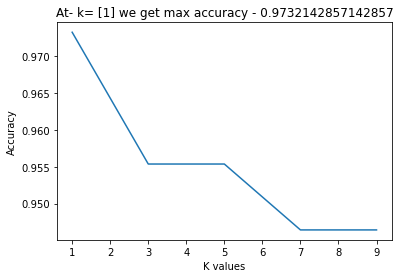

In [30]:
m=max(accuracy)
l=[K[i] for i,val in enumerate(accuracy) if val==m]
plt.plot(K,accuracy)
plt.xlabel("K values")
plt.ylabel("Accuracy")
s="At- k= "+str(l)+" we get max accuracy - "+str(m)
plt.title(s)
plt.show() 